# FISTA vs. Newton 

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from fista_newton import *

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "cmr"
matplotlib.rcParams["font.size"] = "11"

In [13]:
def plot_fista_newton(bench_out, filename=None):
    ps = bench_out['ps']
    index_names = bench_out['index_names']
    times = bench_out['times']
    accs = bench_out['accs']

    markers = ['.', '*', 'v', 'x', '1', '2']
    linestyles = ['-.'] * len(markers)
    
    types = [times, accs]
    type_names = ["Time", "Accuracy"]
    ylabels = ["Time (s)", "$\max_i |\hat{x}_i - \\tilde{x}_i |$"]

    fig, axes = plt.subplots(1, 2, figsize=(8,6), layout='compressed')
    for j in range(2):
        ax = axes[j]
        vals = types[j]
        for i, vals_alg in enumerate(vals):
            ax.plot(ps, vals_alg, marker=markers[i], label=index_names[i], linestyle=linestyles[i])
        if j == 0:
            ax.legend()
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_title(f"{type_names[j]} Comparison")
        ax.set_xlabel("$d$")
        ax.set_ylabel(ylabels[j])
                
    bench_out['plot'] = fig

    if not (filename is None):
        plt.savefig(f"../figures/pgd_newton_{filename}.pdf", bbox_inches='tight')
    plt.show()

    return bench_out

In [14]:
ps = np.array([10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 750, 1000, 2500, 5000, 7500, 10000])

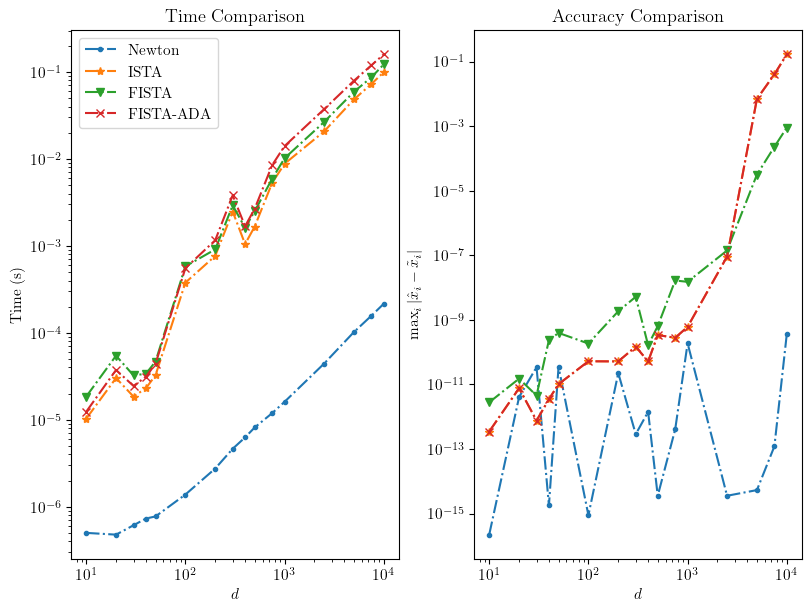

In [15]:
configs = {
    'seed': 69, 
    'min_eval': 0,
    'max_eval': 1, 
    'l1': 1e-1, 
    "l2": 0, 
    "newton_tol": 1e-10, 
    "fista_tol": 1e-13, 
    "max_iters": int(1e4),
    'L_zero_prop': 0.0,
    'L_small_prop': 0.0,
    'newton_times': 1000,
    'fista_times': 10,
    'skip': ['Newton-ABS', 'Newton-Brent', 'Brent'],
}
bench_fista_newton = plot_fista_newton(bench(ps, configs), filename='fista_newton')